<a href="https://colab.research.google.com/github/Andreaierardi/SocialNetworkAnalysis-project/blob/main/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Social Network Analysis Project**

> ## **University of Milan** - **DataScience and Economics**

<br>

#### Author : **Andrea Ierardi**

<br>


---



In [2]:
# Nodes 
# https://github.com/Andreaierardi/SocialNetworkAnalysis-project/blob/main/dataset/fb-pages-food.csv

# Edges
# https://github.com/Andreaierardi/SocialNetworkAnalysis-project/blob/main/dataset/fb-pages-food.edges

In [3]:
import pandas as pd
nodes = pd.read_csv('https://raw.githubusercontent.com/Andreaierardi/SocialNetworkAnalysis-project/main/dataset/fb-pages-food.csv?token=AIWS4RS5NQFGQ4V7AK4BDR27Y7LXU',sep=";")

edges = pd.read_csv('https://raw.githubusercontent.com/Andreaierardi/SocialNetworkAnalysis-project/main/dataset/fb-pages-food.edges?token=AIWS4RQB3NJHZ4HKBI4NADC7Y7L2I')


In [4]:
print(nodes)
print(edges)

                        name   id
0                 Josh Marks  386
1    Blue Ribbon Restaurants  473
2                  Pat Neely    1
3                 La Griglia  542
4                Jose Garces  189
..                       ...  ...
615               Jumia Food  163
616              Luke Thomas  381
617          Clodagh McKenna  140
618  Chef Michelle Bernstein  157
619               SORTEDfood  114

[620 rows x 2 columns]
      source  target
0          0     276
1          0      58
2          0     132
3          0     603
4          0     398
...      ...     ...
2097     597     611
2098     601     603
2099     601     616
2100     603     616
2101     311     613

[2102 rows x 2 columns]


In [78]:
# Nodes as dictionary
nodes_dict = {}
for (n, id) in zip(nodes["name"],nodes["id"]):
  print(n, "+", id)
  nodes_dict[id] = n

Josh Marks + 386
Blue Ribbon Restaurants + 473
Pat Neely + 1
La Griglia + 542
Jose Garces + 189
Zac Kara + 454
Big Fish Seafood Bistro + 158
Tom Aikens + 248
The Habit Burger Grill + 537
Chef Sheldon Simeon + 293
Ochikeron + 171
Taco Bell Cyprus + 485
Christophe Michalak + 258
Peohe's + 534
Destino Ibiza + 500
KFC + 194
Chef Shirley Chung + 34
Doug Adams + 465
משה שגב / Moshe Segev + 562
Angel Leon Gonzalez + 511
Ben Ebbrell - Sorted Chef + 201
Dick's Drive In Restaurant + 188
John Whaite + 440
Andy Luotto + 484
Antonino Cannavacciuolo + 240
Charley's Crab + 533
Anne-Sophie Pic + 235
Hilah Cooking + 82
Taco Bell Costa Rica + 212
Chef Robert Irvine + 35
Nutella Cafe Chicago + 19
Grand Concourse + 154
Domino's Pizza + 334
Chef Lorena Garcia + 148
James Martin + 599
Domino's Pizza + 382
Nando's + 230
Roy Yamaguchi + 7
Susan Feniger + 576
McDonald's + 164
Al Brown New Zealand Chef + 594
Veggie Grill + 396
Domino's Pizza + 284
McDonald's + 63
Franklin Becker + 160
McDonald's + 573
Éric Frec

In [79]:
H = nx.relabel_nodes(G, nodes_dict)
sorted(H)

["'Wichcraft",
 'Aarón Sánchez',
 'Acapulco',
 'Al Brown New Zealand Chef',
 'Alain Ducasse',
 'Alberto Chicote',
 'Alessandro Borghese',
 'Alex Atala',
 'Alex French Guy Cooking',
 'Alex Guarnaschelli',
 'Alfred Portale',
 'Aliya LeeKong',
 'Amandine Chaignot',
 'Amy Thielen',
 'Andy Luotto',
 'Angel Leon Gonzalez',
 'Angelo Sosa',
 'Anis Nabilah',
 'Anjali Pathak',
 'Anne Burrell',
 'Anne-Sophie Pic',
 'Antonino Cannavacciuolo',
 'Aquarium Restaurant - Nashville',
 'Audra Morrice',
 'Bahama Breeze Island Grille',
 'Barbie Marshall',
 'Ben Ebbrell - Sorted Chef',
 'Ben Sargent & Dr. Klaw',
 'Big Fernand',
 'Big Fish Seafood Bistro',
 'Blue Ribbon Fried Chicken',
 'Blue Ribbon Restaurants',
 'Bobby Flay',
 "Bobby's Burger Palace",
 'Bonefish Grill',
 'Boston Market',
 'Bradley Ogden',
 'Brew Bistro and Lounge',
 'Brooke Williamson',
 'Bruno Barbieri',
 'Bruno Ménard',
 'Bruno Oteiza',
 'Bryce Shuman',
 'Bubba Gump Shrimp Co.',
 'Buddy Valastro',
 'Burger King Malaysia',
 'Burger King M

In [5]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
G = nx.Graph()

for e in edges.values.tolist():
  G.add_edge(e[0],e[1])

In [7]:
print('Number of nodes: {} - Number of links:{}'.format(G.order(),G.size()))


Number of nodes: 620 - Number of links:2102


In [8]:
density = nx.density(G)
print('Density: {}'.format(density))

Density: 0.0109541925061233


## Degree Analysis

In [9]:
degree = list(dict(G.degree()).values())


In [10]:
print('Standard deviation: {}'.format(np.std(degree)))
print('Median: {}'.format(np.median(degree)))
print('Min: {}'.format(np.min(degree)))
print('Max: {}'.format(np.max(degree)))

Standard deviation: 9.46914920573866
Median: 4.0
Min: 1
Max: 134


Text(0, 0.5, 'ECDF Food')

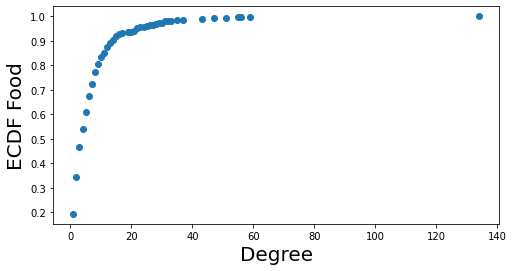

In [11]:

# ECDF linear scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.plot(x,y,marker='o',ms=6, linestyle='None')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Food', size = 20)

Text(0, 0.5, 'ECDF Food')

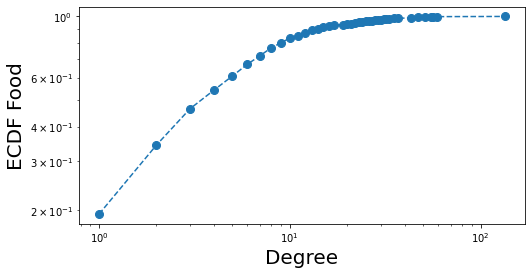

In [12]:

# ECDF loglog scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Food', size = 20)


Text(0, 0.5, 'ECCDF FOOD')

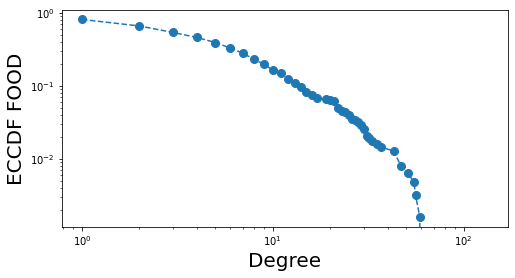

In [13]:
# ECCDF
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF FOOD', size = 20)

In [14]:
p = density
random_graph = nx.fast_gnp_random_graph(G.order(),p)


In [15]:
print('Number of nodes: {}'.format(random_graph.order()))
print('Number of links: {}'.format(random_graph.size()))

Number of nodes: 620
Number of links: 2082


In [16]:
random_degree = list(dict(random_graph.degree()).values())


Text(0, 0.5, 'ECCDF')

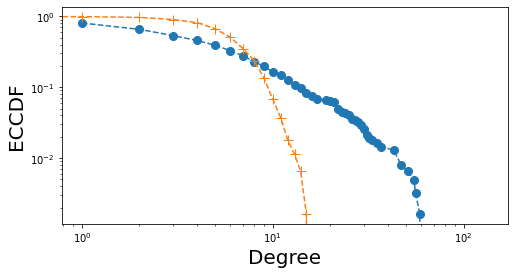

In [17]:
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf_fb = plt.figure(figsize=(8,4))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.loglog(x_random,1-y_random,marker='+',ms=10, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)

## HUBS

In [18]:
percentile_99 = np.percentile(degree,99)
print(percentile_99)

47.0


In [19]:
hub_nodi = [k for k,v in dict(G.degree()).items() if v>= percentile_99]


In [20]:
print(len(hub_nodi))
print(list(hub_nodi))

8
[265, 611, 90, 518, 340, 56, 67, 70]


In [21]:
print(list(nx.isolates(G)))


[]


## Connectivity

In [22]:
print(nx.is_connected(G))
print(nx.number_connected_components(G))

True
1


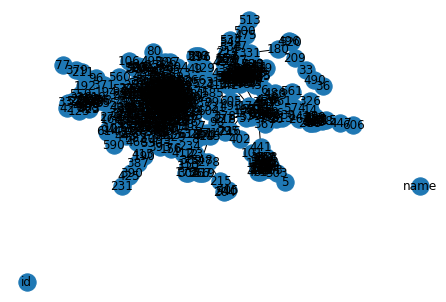

In [89]:
nx.draw(G,with_labels=True)


In [24]:
nx.number_connected_components(G)

1

In [25]:
dir(G)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edg

In [26]:
G.nodes()

NodeView((0, 276, 58, 132, 603, 398, 555, 1, 265, 611, 2, 182, 345, 3, 608, 377, 40, 352, 450, 484, 299, 65, 185, 228, 557, 227, 90, 151, 394, 4, 287, 254, 336, 5, 503, 6, 429, 163, 486, 478, 518, 7, 293, 305, 339, 35, 444, 583, 8, 278, 434, 73, 98, 369, 9, 317, 288, 206, 289, 249, 593, 550, 131, 446, 89, 15, 340, 248, 229, 56, 570, 189, 107, 23, 465, 67, 351, 498, 10, 393, 258, 11, 212, 485, 264, 380, 174, 259, 12, 548, 618, 310, 13, 14, 326, 70, 454, 505, 43, 432, 16, 516, 119, 400, 545, 334, 237, 374, 117, 274, 613, 466, 75, 17, 18, 408, 418, 581, 143, 599, 20, 324, 355, 481, 238, 242, 160, 21, 441, 329, 22, 270, 187, 104, 420, 128, 257, 277, 157, 343, 54, 24, 547, 230, 502, 306, 501, 591, 25, 363, 26, 27, 424, 28, 147, 527, 29, 49, 30, 126, 31, 285, 543, 357, 507, 508, 491, 169, 595, 41, 63, 327, 266, 48, 179, 546, 142, 449, 269, 524, 488, 515, 193, 315, 32, 183, 364, 159, 300, 504, 118, 430, 164, 165, 127, 395, 596, 79, 448, 335, 307, 572, 313, 45, 532, 526, 552, 517, 181, 558, 51

In [27]:
G.add_nodes_from(nodes)

In [28]:
len(nx.triangles(G))

622

In [29]:
nx.transitivity(G)


0.22264084150905228

In [64]:
clusters = nx.clustering(G)
clusters

{0: 0.26666666666666666,
 1: 1.0,
 10: 0,
 100: 0,
 101: 0.5238095238095238,
 102: 0.2857142857142857,
 103: 0.6666666666666666,
 104: 0.4,
 105: 0,
 106: 0.3333333333333333,
 107: 0.5151515151515151,
 108: 0.6,
 109: 0.3333333333333333,
 11: 0.9333333333333333,
 110: 1.0,
 111: 0.5,
 112: 0,
 113: 0.4,
 114: 0.17857142857142858,
 115: 1.0,
 116: 0.29004329004329005,
 117: 0.7564102564102564,
 118: 0.3333333333333333,
 119: 0.8939393939393939,
 12: 0,
 120: 1.0,
 121: 0.3,
 122: 0,
 123: 0.6,
 124: 0.6666666666666666,
 125: 0,
 126: 0.5,
 127: 0.8333333333333334,
 128: 0.21666666666666667,
 129: 0,
 13: 0,
 130: 0.3111111111111111,
 131: 0.32,
 132: 0,
 133: 0,
 134: 0.38095238095238093,
 135: 0.07575757575757576,
 136: 0.13186813186813187,
 137: 0.6,
 138: 0,
 139: 1.0,
 14: 0,
 140: 0,
 141: 0.1,
 142: 0.42857142857142855,
 143: 0.23076923076923078,
 144: 0.8,
 145: 0.5333333333333333,
 146: 0.3055555555555556,
 147: 0.4,
 148: 0.3,
 149: 0.7,
 15: 0.5777777777777777,
 150: 0.7333333

In [67]:
nx.degree_centrality(G)

{0: 0.00966183574879227,
 1: 0.00322061191626409,
 10: 0.00322061191626409,
 100: 0.001610305958132045,
 101: 0.011272141706924315,
 102: 0.01288244766505636,
 103: 0.004830917874396135,
 104: 0.00966183574879227,
 105: 0.00322061191626409,
 106: 0.004830917874396135,
 107: 0.01932367149758454,
 108: 0.008051529790660225,
 109: 0.00644122383252818,
 11: 0.00966183574879227,
 110: 0.00322061191626409,
 111: 0.00644122383252818,
 112: 0.00322061191626409,
 113: 0.01610305958132045,
 114: 0.01288244766505636,
 115: 0.00322061191626409,
 116: 0.03542673107890499,
 117: 0.020933977455716585,
 118: 0.00644122383252818,
 119: 0.01932367149758454,
 12: 0.004830917874396135,
 120: 0.00322061191626409,
 121: 0.008051529790660225,
 122: 0.004830917874396135,
 123: 0.00966183574879227,
 124: 0.00644122383252818,
 125: 0.004830917874396135,
 126: 0.00644122383252818,
 127: 0.00644122383252818,
 128: 0.02576489533011272,
 129: 0.00322061191626409,
 13: 0.001610305958132045,
 130: 0.01610305958132045